+++++[link text](https:// [link text](https://))### 1. Read environment

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 32 # minibatch size
# GAMMA = 0.9  # discount factor
TAU = 1e-3  # for soft update of target parameters
LR = 1e-4  # learning rate
UPDATE_EVERY = 4  # how often to update the network
def dqn(n_episodes=epoch_no, max_t=1000, eps_start=1.0, eps_end=0.1, eps_decay=0.993,bench_score=1500000):
weight_decay=0.999


### 4. Plotting and Data Record

In [28]:
import pandas as pd
df_dqnp = pd.read_csv('data_dqnp.csv', skiprows=1, names=['dqnp_epi_scores','dqnp_epi_task','dqnp_epi_energy','dqnp_epi_latency','dqnp_epi_num_task','dqnp_epi_task_P1','dqnp_epi_task_P2',
           'dqnp_epi_task_P3','dqnp_epi_latency_P1','dqnp_epi_latency_P2','dqnp_epi_latency_P3',
           'dqnp_epi_energy_P1','dqnp_epi_energy_P2','dqnp_epi_energy_P3','dqnp_epi_num_task_P1','dqnp_epi_num_task_P2','dqnp_epi_num_task_P3',
           'dqnp_epi_datasize','dqnp_epi_datasize_P1','dqnp_epi_datasize_P2','dqnp_epi_datasize_P3','dqnp_epi_task_select_P1','dqnp_epi_task_select_P2','dqnp_epi_task_select_P3'])

df_dqnb = pd.read_csv('data_dqnb.csv', skiprows=1, names=['dqnb_epi_scores','dqnb_epi_task','dqnb_epi_energy','dqnb_epi_latency','dqnb_epi_num_task','dqnb_epi_task_P1','dqnb_epi_task_P2',
           'dqnb_epi_task_P3','dqnb_epi_latency_P1','dqnb_epi_latency_P2','dqnb_epi_latency_P3',
           'dqnb_epi_energy_P1','dqnb_epi_energy_P2','dqnb_epi_energy_P3','dqnb_epi_num_task_P1','dqnb_epi_num_task_P2','dqnb_epi_num_task_P3',
           'dqnb_epi_datasize','dqnb_epi_datasize_P1','dqnb_epi_datasize_P2','dqnb_epi_datasize_P3','dqnb_epi_task_select_P1','dqnb_epi_task_select_P2','dqnb_epi_task_select_P3'])

df_greedy = pd.read_csv('data_greedy.csv', skiprows=1, names=['greedy_epi_scores','greedy_epi_task','greedy_epi_energy','greedy_epi_latency','greedy_epi_num_task','greedy_epi_task_P1','greedy_epi_task_P2',
           'greedy_epi_task_P3','greedy_epi_latency_P1','greedy_epi_latency_P2','greedy_epi_latency_P3',
           'greedy_epi_energy_P1','greedy_epi_energy_P2','greedy_epi_energy_P3','greedy_epi_num_task_P1','greedy_epi_num_task_P2','greedy_epi_num_task_P3',
           'greedy_epi_datasize','greedy_epi_datasize_P1','greedy_epi_datasize_P2','greedy_epi_datasize_P3','greedy_epi_task_select_P1','greedy_epi_task_select_P2','greedy_epi_task_select_P3'])



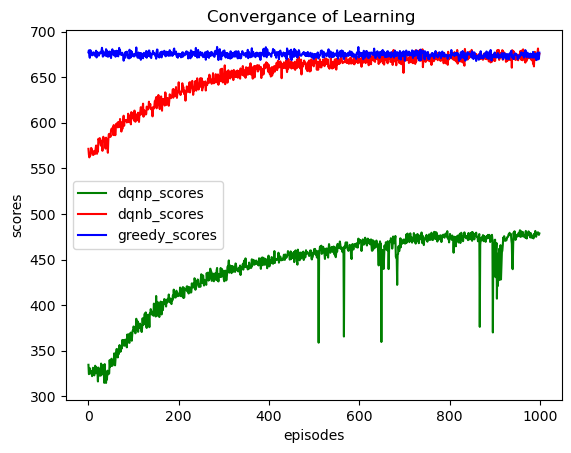

478.5999999999994 675.5700000000002 676.8800000000002


<Figure size 640x480 with 0 Axes>

In [60]:
import os

# Extract the specified column as a list
dqnp_epi_scores = df_dqnp['dqnp_epi_scores'].tolist()
dqnb_epi_scores = df_dqnb['dqnb_epi_scores'].tolist()
greedy_epi_scores = df_greedy['greedy_epi_scores'].tolist()



plt.plot(dqnp_epi_scores, label='dqnp_scores',color='green')
plt.plot(dqnb_epi_scores, label='dqnb_scores',color='red')
plt.plot(greedy_epi_scores, label='greedy_scores',color='blue')


# Set the labels and title
plt.xlabel('episodes')
plt.ylabel('scores')
plt.title('Convergance of Learning ')
plt.legend()

# Show the plot
plt.show()

print(dqnp_epi_scores[-1],dqnb_epi_scores[-1],greedy_epi_scores[-1])


In [25]:
print(dqnb_epi_scores[-1])
window_size=100

675.5700000000002


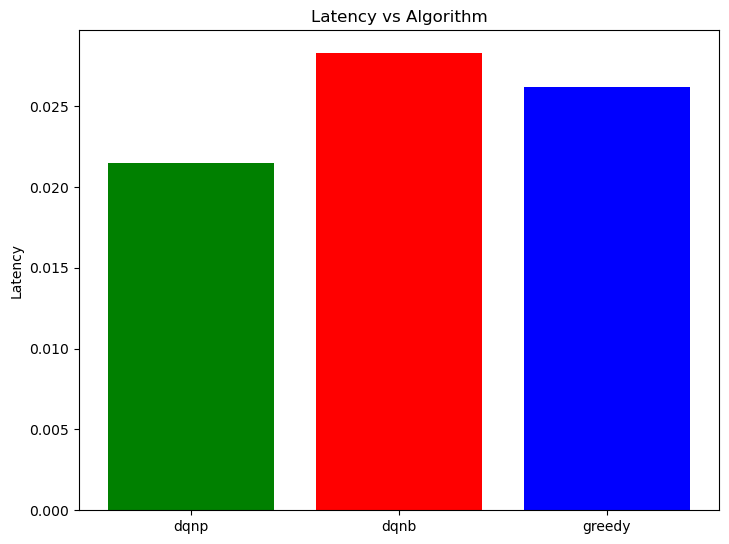

[0.0214611114653749, 0.0282903895225476, 0.026167779056792066]
[0.0332340680589595, 0.033410043215098, 0.0327383790625301, 0.0340907950529728, 0.0322804294090608, 0.0310556240533992, 0.0318381346175527, 0.0323911339271215, 0.0330876603917938, 0.0319613091054844, 0.0321788236286533, 0.0330655804205945, 0.0325109079912435, 0.0310071328190676, 0.0311424998622116, 0.0331855558572252, 0.0323182713200549, 0.0324730774107274, 0.0322705453770759, 0.0339163705186403, 0.0337794017133867, 0.0338549712799814, 0.0313244380353325, 0.0324496608354017, 0.0320820559784806, 0.031592514525858, 0.031551937445028, 0.030975740506984, 0.0318184987042382, 0.0331026291073839, 0.0317648311183293, 0.032896959525552, 0.0314279859202884, 0.032466126006095, 0.03107397653219, 0.0315646554438394, 0.0320057923920286, 0.0313702856591985, 0.0322622711979005, 0.0313326543043192, 0.032622379564151, 0.0333532222314009, 0.0325053998817348, 0.0322872990827143, 0.0320298550703531, 0.0321899311534435, 0.0312634448287446, 0.030

In [58]:


# Extract the specified column as a list
dqnp_epi_latency = df_dqnp['dqnp_epi_latency'].tolist()
dqnb_epi_latency = df_dqnb['dqnb_epi_latency'].tolist()
greedy_epi_latency = df_greedy['greedy_epi_latency'].tolist()



window_size=100



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algor = ['dqnp', 'dqnb','greedy']
data=[sum(dqnp_epi_latency[-window_size:])/window_size,sum(dqnb_epi_latency[-window_size:])/window_size,sum(greedy_epi_latency[-window_size:])/window_size]
colors=['green','red','blue']

ax.bar(algor,data,color=colors)
ax.set_ylabel('Latency')
ax.set_title('Latency vs Algorithm')

plt.show()
print(data)
print(dqnb_epi_latency)


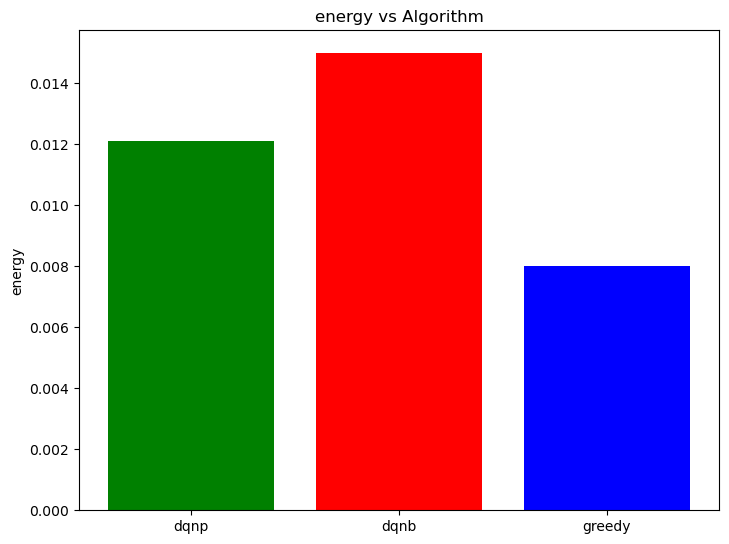

[0.012086163841385732, 0.014981500356645854, 0.008000890293203038]
[0.0583365525206448, 0.1006975343390062, 0.5593720630777538, 0.1174401142637413, 0.099015520597511, 0.0739166926327364, 0.0806813879417657, 0.0689587103625388, 0.0771548460613859, 0.0718875004380014, 0.0891453223162988, 0.097177878503638, 0.0719967233690416, 0.0716265528624048, 0.1956751418665075, 0.0930111886132228, 0.0808526006864716, 0.0968573475117962, 0.0803681101232543, 0.0653633163878207, 0.0605221999086715, 0.0875979695977066, 0.0674409783894921, 0.0627551444056419, 0.0575246452795605, 0.0491831525752759, 0.0656738457937155, 0.0620339236243197, 0.0787269523763968, 0.0561151115602484, 0.0547358377112251, 0.097610744567773, 0.0597713620812594, 0.0849707416483811, 0.0647333851288169, 0.0786849395604748, 0.0742470060195644, 0.203853304140108, 0.1045094749925927, 0.0643779363504012, 0.2463909096751445, 0.0619978478144429, 0.2563674115035577, 1.868337783039532, 0.2338224951067188, 0.0539071978168793, 0.055096018165557

In [63]:


# Extract the specified column as a list
dqnp_epi_energy = df_dqnp['dqnp_epi_energy'].tolist()
dqnb_epi_energy = df_dqnb['dqnb_epi_energy'].tolist()
greedy_epi_energy = df_greedy['greedy_epi_energy'].tolist()



window_size=100



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algor = ['dqnp', 'dqnb','greedy']
data=[sum(dqnp_epi_energy[-window_size:])/window_size,sum(dqnb_epi_energy[-window_size:])/window_size,sum(greedy_epi_energy[-window_size:])/window_size]
colors=['green','red','blue']

ax.bar(algor,data,color=colors)
ax.set_ylabel('energy')
ax.set_title('energy vs Algorithm')

plt.show()
print(data)
print(dqnb_epi_energy)


[[258.81, 353.69, 387.5], [379.39, 332.4, 288.21], [20.08, 122.21, 857.71]]


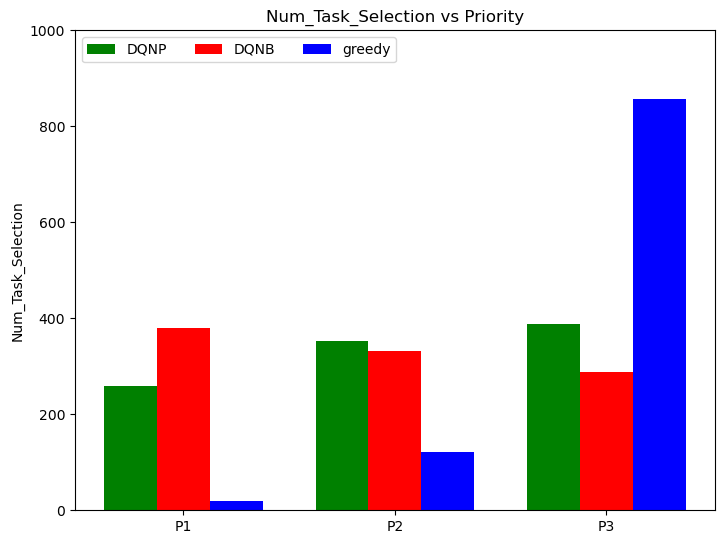

In [57]:

import numpy as np
import matplotlib.pyplot as plt
dqnp_epi_task_select_P1=df_dqnp['dqnp_epi_task_select_P1']
dqnp_epi_task_select_P2=df_dqnp['dqnp_epi_task_select_P2']
dqnp_epi_task_select_P3=df_dqnp['dqnp_epi_task_select_P3']

dqnb_epi_task_select_P1=df_dqnb['dqnb_epi_task_select_P1']
dqnb_epi_task_select_P2=df_dqnb['dqnb_epi_task_select_P2']
dqnb_epi_task_select_P3=df_dqnb['dqnb_epi_task_select_P3']

greedy_epi_task_select_P1=df_greedy['greedy_epi_task_select_P1']
greedy_epi_task_select_P2=df_greedy['greedy_epi_task_select_P2']
greedy_epi_task_select_P3=df_greedy['greedy_epi_task_select_P3']

XX=['P1','P2','P3']
data=[[sum(dqnp_epi_task_select_P1[-window_size:])/window_size,sum(dqnp_epi_task_select_P2[-window_size:])/window_size,sum(dqnp_epi_task_select_P3[-window_size:])/window_size],[sum(dqnb_epi_task_select_P1[-window_size:])/window_size,
    sum(dqnb_epi_task_select_P2[-window_size:])/window_size,sum(dqnb_epi_task_select_P3[-window_size:])/window_size],[sum(greedy_epi_task_select_P1[-window_size:])/window_size,
    sum(greedy_epi_task_select_P2[-window_size:])/window_size,sum(greedy_epi_task_select_P3[-window_size:])/window_size]]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'g', width = 0.25,label='DQNP')
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25,label='DQNB')
ax.bar(X + 0.50, data[2], color = 'b', width = 0.25,label='greedy')
ax.set_ylabel('Num_Task_Selection')
ax.set_title('Num_Task_Selection vs Priority')

ax.legend(loc='upper left', ncols=3)
ax.set_xticks(X + 0.25, XX)
ax.set_ylim(0, 1000)
print(data)


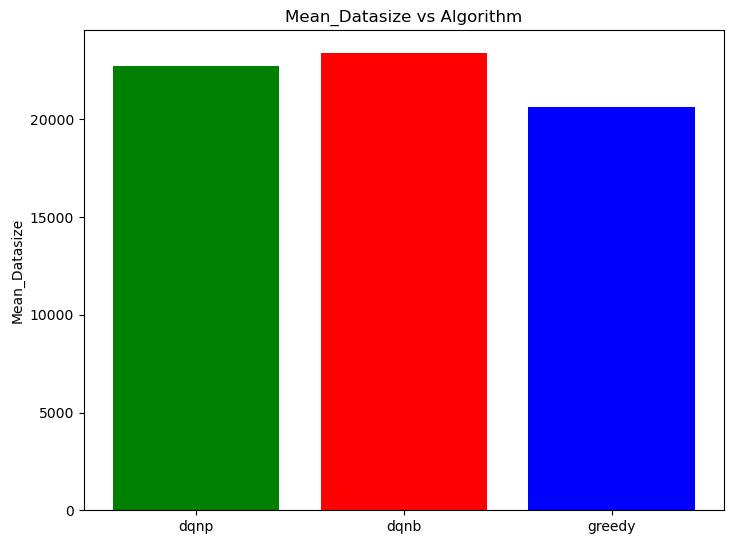

[22741.376189999995, 23377.796479999997, 20599.3555]
[23575.881, 23382.167, 23666.463, 22808.193, 23095.586, 22662.81, 22924.314, 22666.072, 23436.423, 22855.093, 23102.122, 23717.264, 23531.598, 23425.793, 23075.109, 23366.07, 23853.204, 23052.689, 23473.429, 23949.032, 23966.196, 23526.331, 22527.984, 23302.588, 23120.065, 23606.374, 23074.301, 23429.601, 22784.329, 22821.315, 23516.82, 24291.085, 22996.863, 23834.124, 23201.651, 23562.945, 23060.198, 23931.189, 24470.896, 23173.778, 23505.778, 23680.985, 23865.11, 23589.014, 23154.782, 23569.875, 23155.657, 23123.001, 23426.105, 23146.579, 23209.116, 23160.146, 22762.898, 23088.225, 22700.325, 22868.417, 22749.194, 23220.754, 23118.311, 24099.103, 23630.431, 22905.971, 23664.798, 23403.647, 23356.244, 23335.537, 23485.683, 22525.961, 23634.29, 23568.165, 23686.13, 23055.067, 24037.697, 23143.851, 23408.254, 23595.764, 23735.577, 23662.295, 22897.239, 23777.087, 23284.94, 23564.389, 23208.163, 22809.66, 23501.99, 22902.971, 23365.875

In [61]:


# Extract the specified column as a list
dqnp_epi_datasize = df_dqnp['dqnp_epi_datasize'].tolist()
dqnb_epi_datasize = df_dqnb['dqnb_epi_datasize'].tolist()
greedy_epi_datasize = df_greedy['greedy_epi_datasize'].tolist()



window_size=100



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algor = ['dqnp', 'dqnb','greedy']
data=[sum(dqnp_epi_datasize[-window_size:])/window_size,sum(dqnb_epi_datasize[-window_size:])/window_size,sum(greedy_epi_datasize[-window_size:])/window_size]
colors=['green','red','blue']

ax.bar(algor,data,color=colors)
ax.set_ylabel('Mean_Datasize')
ax.set_title('Mean_Datasize vs Algorithm')
plt.show()
print(data)
print(dqnb_epi_datasize)


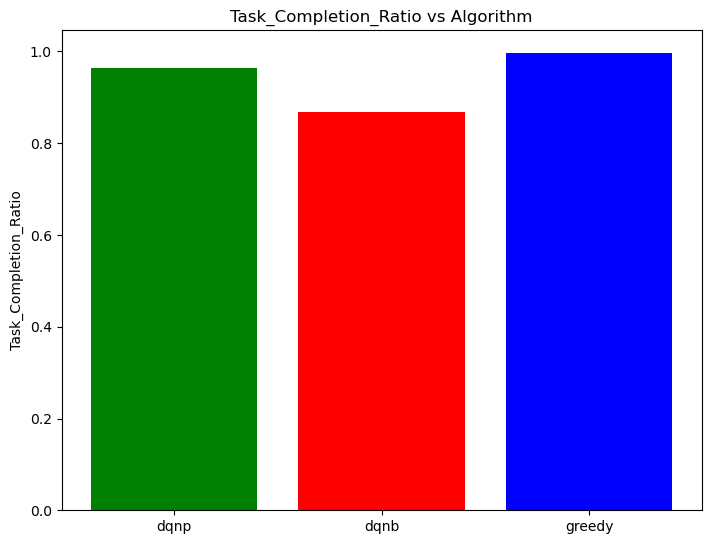

[0.9642799999999998, 0.86694, 0.9962599999999998]
[0.571, 0.588, 0.569, 0.583, 0.562, 0.551, 0.576, 0.583, 0.586, 0.582, 0.574, 0.567, 0.565, 0.561, 0.573, 0.584, 0.59, 0.611, 0.554, 0.572, 0.586, 0.58, 0.605, 0.616, 0.596, 0.581, 0.587, 0.572, 0.602, 0.587, 0.597, 0.587, 0.604, 0.631, 0.594, 0.615, 0.617, 0.608, 0.581, 0.607, 0.637, 0.618, 0.612, 0.588, 0.631, 0.615, 0.614, 0.609, 0.621, 0.632, 0.629, 0.651, 0.633, 0.648, 0.643, 0.615, 0.647, 0.642, 0.652, 0.634, 0.627, 0.656, 0.636, 0.65, 0.671, 0.65, 0.66, 0.668, 0.642, 0.629, 0.67, 0.658, 0.646, 0.631, 0.66, 0.635, 0.663, 0.672, 0.698, 0.664, 0.651, 0.673, 0.674, 0.663, 0.648, 0.669, 0.675, 0.671, 0.671, 0.687, 0.662, 0.673, 0.687, 0.675, 0.676, 0.687, 0.696, 0.688, 0.679, 0.68, 0.668, 0.668, 0.67, 0.684, 0.653, 0.68, 0.687, 0.673, 0.685, 0.674, 0.707, 0.699, 0.656, 0.7, 0.686, 0.701, 0.713, 0.701, 0.695, 0.686, 0.707, 0.735, 0.694, 0.705, 0.675, 0.695, 0.713, 0.692, 0.694, 0.718, 0.688, 0.709, 0.709, 0.692, 0.7, 0.728, 0.717, 0.70

In [62]:


# Extract the specified column as a list
dqnp_epi_task = df_dqnp['dqnp_epi_task'].tolist()
dqnb_epi_task = df_dqnb['dqnb_epi_task'].tolist()
greedy_epi_task = df_greedy['greedy_epi_task'].tolist()



window_size=100



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algor = ['dqnp', 'dqnb','greedy']
data=[sum(dqnp_epi_task[-window_size:])/window_size,sum(dqnb_epi_task[-window_size:])/window_size,sum(greedy_epi_task[-window_size:])/window_size]
colors=['green','red','blue']

ax.bar(algor,data,color=colors)
ax.set_ylabel('Task_Completion_Ratio')
ax.set_title('Task_Completion_Ratio vs Algorithm')
plt.show()
print(data)
print(dqnb_epi_task)


[[249.83, 340.81, 373.64], [329.75, 287.35, 249.84], [18.07, 121.2, 856.99]]


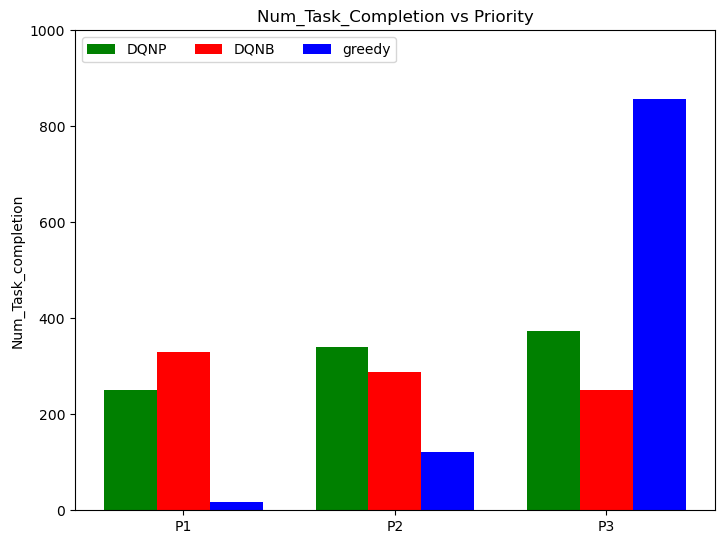

In [36]:

import numpy as np
import matplotlib.pyplot as plt
dqnp_epi_num_task_P1=df_dqnp['dqnp_epi_num_task_P1']
dqnp_epi_num_task_P2=df_dqnp['dqnp_epi_num_task_P2']
dqnp_epi_num_task_P3=df_dqnp['dqnp_epi_num_task_P3']

dqnb_epi_num_task_P1=df_dqnb['dqnb_epi_num_task_P1']
dqnb_epi_num_task_P2=df_dqnb['dqnb_epi_num_task_P2']
dqnb_epi_num_task_P3=df_dqnb['dqnb_epi_num_task_P3']

greedy_epi_num_task_P1=df_greedy['greedy_epi_num_task_P1']
greedy_epi_num_task_P2=df_greedy['greedy_epi_num_task_P2']
greedy_epi_num_task_P3=df_greedy['greedy_epi_num_task_P3']

XX=['P1','P2','P3']
data=[[sum(dqnp_epi_num_task_P1[-window_size:])/window_size,sum(dqnp_epi_num_task_P2[-window_size:])/window_size,sum(dqnp_epi_num_task_P3[-window_size:])/window_size],[sum(dqnb_epi_num_task_P1[-window_size:])/window_size,
    sum(dqnb_epi_num_task_P2[-window_size:])/window_size,sum(dqnb_epi_num_task_P3[-window_size:])/window_size],[sum(greedy_epi_num_task_P1[-window_size:])/window_size,
    sum(greedy_epi_num_task_P2[-window_size:])/window_size,sum(greedy_epi_num_task_P3[-window_size:])/window_size]]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'g', width = 0.25,label='DQNP')
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25,label='DQNB')
ax.bar(X + 0.50, data[2], color = 'b', width = 0.25,label='greedy')
ax.set_ylabel('Num_Task_completion')
ax.set_title('Num_Task_Completion vs Priority')

ax.legend(loc='upper left', ncols=3)
ax.set_xticks(X + 0.25, XX)
ax.set_ylim(0, 1000)
print(data)


[[0.02377490242754751, 0.021892110138108198, 0.019501964962807424], [0.03171792200943287, 0.027923752479142586, 0.024198969683925917], [0.03212516860615104, 0.029315181504287954, 0.025592387784160717]]


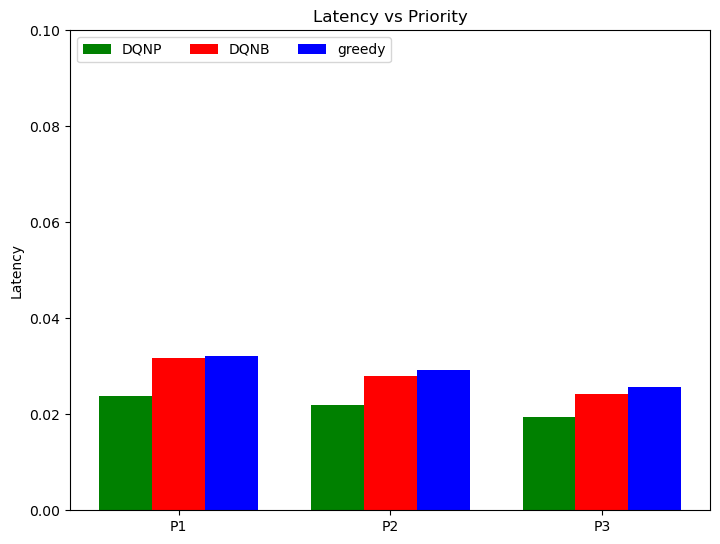

In [53]:

import numpy as np
import matplotlib.pyplot as plt
dqnp_epi_latency_P1=df_dqnp['dqnp_epi_latency_P1']
dqnp_epi_latency_P2=df_dqnp['dqnp_epi_latency_P2']
dqnp_epi_latency_P3=df_dqnp['dqnp_epi_latency_P3']

dqnb_epi_latency_P1=df_dqnb['dqnb_epi_latency_P1']
dqnb_epi_latency_P2=df_dqnb['dqnb_epi_latency_P2']
dqnb_epi_latency_P3=df_dqnb['dqnb_epi_latency_P3']

greedy_epi_latency_P1=df_greedy['greedy_epi_latency_P1']
greedy_epi_latency_P2=df_greedy['greedy_epi_latency_P2']
greedy_epi_latency_P3=df_greedy['greedy_epi_latency_P3']

XX=['P1','P2','P3']
data=[[sum(dqnp_epi_latency_P1[-window_size:])/window_size,sum(dqnp_epi_latency_P2[-window_size:])/window_size,sum(dqnp_epi_latency_P3[-window_size:])/window_size],[sum(dqnb_epi_latency_P1[-window_size:])/window_size,
    sum(dqnb_epi_latency_P2[-window_size:])/window_size,sum(dqnb_epi_latency_P3[-window_size:])/window_size],[sum(greedy_epi_latency_P1[-window_size:])/window_size,
    sum(greedy_epi_latency_P2[-window_size:])/window_size,sum(greedy_epi_latency_P3[-window_size:])/window_size]]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'g', width = 0.25,label='DQNP')
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25,label='DQNB')
ax.bar(X + 0.50, data[2], color = 'b', width = 0.25,label='greedy')
ax.set_ylabel('Latency')
ax.set_title('Latency vs Priority')

ax.legend(loc='upper left', ncols=3)
ax.set_xticks(X + 0.25, XX)
ax.set_ylim(0,0.1)
print(data)


[[0.012267413710535217, 0.011941369349253873, 0.012097292665919983], [0.015432647240247203, 0.015162195310134526, 0.014168060354466711], [0.00971506223502823, 0.00849932963133934, 0.007890145200271622]]


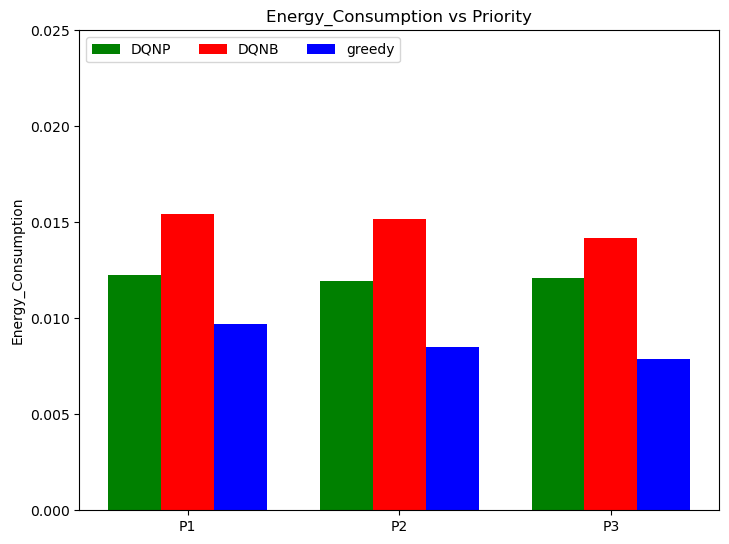

In [54]:

import numpy as np
import matplotlib.pyplot as plt
dqnp_epi_energy_P1=df_dqnp['dqnp_epi_energy_P1']
dqnp_epi_energy_P2=df_dqnp['dqnp_epi_energy_P2']
dqnp_epi_energy_P3=df_dqnp['dqnp_epi_energy_P3']

dqnb_epi_energy_P1=df_dqnb['dqnb_epi_energy_P1']
dqnb_epi_energy_P2=df_dqnb['dqnb_epi_energy_P2']
dqnb_epi_energy_P3=df_dqnb['dqnb_epi_energy_P3']

greedy_epi_energy_P1=df_greedy['greedy_epi_energy_P1']
greedy_epi_energy_P2=df_greedy['greedy_epi_energy_P2']
greedy_epi_energy_P3=df_greedy['greedy_epi_energy_P3']

XX=['P1','P2','P3']
data=[[sum(dqnp_epi_energy_P1[-window_size:])/window_size,sum(dqnp_epi_energy_P2[-window_size:])/window_size,sum(dqnp_epi_energy_P3[-window_size:])/window_size],[sum(dqnb_epi_energy_P1[-window_size:])/window_size,
    sum(dqnb_epi_energy_P2[-window_size:])/window_size,sum(dqnb_epi_energy_P3[-window_size:])/window_size],[sum(greedy_epi_energy_P1[-window_size:])/window_size,
    sum(greedy_epi_energy_P2[-window_size:])/window_size,sum(greedy_epi_energy_P3[-window_size:])/window_size]]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'g', width = 0.25,label='DQNP')
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25,label='DQNB')
ax.bar(X + 0.50, data[2], color = 'b', width = 0.25,label='greedy')
ax.set_ylabel('Energy_Consumption')
ax.set_title('Energy_Consumption vs Priority')

ax.legend(loc='upper left', ncols=3)
ax.set_xticks(X + 0.25, XX)
ax.set_ylim(0, 0.025)
print(data)


[[0.9656862136189, 0.964299133855956, 0.9651354334511757], [0.8691181251372835, 0.86448744341125, 0.866840689914808], [0.8988953764895463, 0.9917735314794983, 0.999159747393001]]


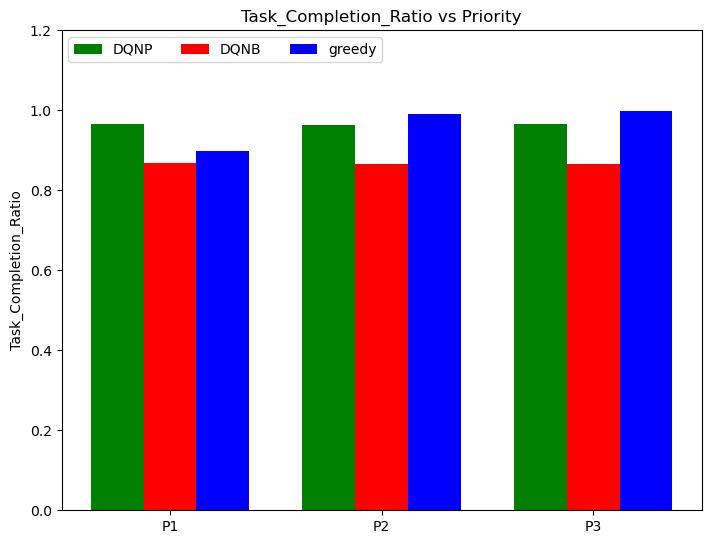

In [56]:

import numpy as np
import matplotlib.pyplot as plt
dqnp_epi_task_P1=df_dqnp['dqnp_epi_task_P1']
dqnp_epi_task_P2=df_dqnp['dqnp_epi_task_P2']
dqnp_epi_task_P3=df_dqnp['dqnp_epi_task_P3']

dqnb_epi_task_P1=df_dqnb['dqnb_epi_task_P1']
dqnb_epi_task_P2=df_dqnb['dqnb_epi_task_P2']
dqnb_epi_task_P3=df_dqnb['dqnb_epi_task_P3']

greedy_epi_task_P1=df_greedy['greedy_epi_task_P1']
greedy_epi_task_P2=df_greedy['greedy_epi_task_P2']
greedy_epi_task_P3=df_greedy['greedy_epi_task_P3']

XX=['P1','P2','P3']
data=[[sum(dqnp_epi_task_P1[-window_size:])/window_size,sum(dqnp_epi_task_P2[-window_size:])/window_size,sum(dqnp_epi_task_P3[-window_size:])/window_size],[sum(dqnb_epi_task_P1[-window_size:])/window_size,
    sum(dqnb_epi_task_P2[-window_size:])/window_size,sum(dqnb_epi_task_P3[-window_size:])/window_size],[sum(greedy_epi_task_P1[-window_size:])/window_size,
    sum(greedy_epi_task_P2[-window_size:])/window_size,sum(greedy_epi_task_P3[-window_size:])/window_size]]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'g', width = 0.25,label='DQNP')
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25,label='DQNB')
ax.bar(X + 0.50, data[2], color = 'b', width = 0.25,label='greedy')
ax.set_ylabel('Task_Completion_Ratio')
ax.set_title('Task_Completion_Ratio vs Priority')

ax.legend(loc='upper left', ncols=3)
ax.set_xticks(X + 0.25, XX)
ax.set_ylim(0, 1.2)
print(data)


In [64]:
import numpy as np

# Sample class labels (replace this with your actual labels)
y_train = np.array([0, 1, 1, 2, 2, 2, 3, 3])

# Get unique classes and their counts
unique_classes, class_counts = np.unique(y_train, return_counts=True)

# Print the results
print("Unique Classes:", unique_classes)
print("Class Counts:", class_counts)


Unique Classes: [0 1 2 3]
Class Counts: [1 2 3 2]
